<a href="https://colab.research.google.com/github/9more/Projects/blob/main/Infront_Booking_Sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Daily booking sheet. Sheet generated from filtering a database of multiple rows and columns.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sys
path = input('paste the url here ')
sheet_id = path.split('/d/')[1].split('/edit')[0]
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'
data = pd.read_csv(csv_url, skiprows=1)
today=pd.to_datetime('today').strftime('%d/%m/%Y')


In [2]:
def get_df(df):
  today=pd.to_datetime('today').strftime('%d-%m-%Y')
  df.columns=df.columns.str.lower().str.strip()
  if 'competition' in df.columns:
      df.set_index('competition', inplace=True)
  df = df[['date','start gmt', 'home', 'away','srt / rtmp url','igame channel','ingest method', 'sport']]
  df.sort_values(by=['start gmt'], inplace=True)
  df['date'] = pd.to_datetime(df['date'], format='mixed')
  df.fillna('to be announed later', inplace=True)
  df1= df[df['date']==today]
  df1.to_csv(f'Booking Sheet for {today}.csv')
  return df1

def graphs(df, i, j='barh',t=None):
  Title=input('Enter Chart Title ')
  color=input('Enter Chart Color ')
  if i == 'competition':
    df.sort_values(by=['start gmt'], inplace=True)
    df.index.value_counts().plot(kind=j, color=color, figsize=(10,5), title=Title, fontsize=12)
  else:
    df[i].value_counts().plot(kind=j, color=color, figsize=(10,5), title=Title, fontsize=12)

In [3]:
get_df(data)

,date,start gmt,home,away,srt / rtmp url,igame channel,ingest method,sport
competition,,,,,,,,
Brazilian Football Serie A,2025-02-08,0:00,Fluminense,Gremio,SRT 03,INF_CH273,SRT,Soccer
Brazilian Football Serie B,2025-02-08,0:30,Operario,Criciuma,6042,INF_CH98,SRT,Soccer
Swedish Football Ettan,2025-02-08,11:00,Sollentuna FK,Enkopings SK FK,srt://98.128.209.54:5057,INF_XVI_CH57,SRT,Soccer
Swedish Football Ettan,2025-02-08,11:00,Stockholm Internazionale,Orebro Syrianska IF,srt://98.128.209.54:5058,INF_XVI_CH58,SRT,Soccer
Swedish Football Ettan,2025-02-08,11:00,Lunds BK,Husqvarna FF,srt://98.128.209.54:5059,INF_XVI_CH59,SRT,Soccer
German Football 3rd Division,2025-02-08,12:00,Ingolstadt,Regensburg,Sat details in folder,INF_CH150 (.237),SRT,Soccer
German Football 3rd Division,2025-02-08,12:00,Mannheim,Verl,Sat details in folder,INF_CH151 (.238),SRT,Soccer
German Football 3rd Division,2025-02-08,12:00,Vfl Osnabruck,Alemannia Aachen,Sat details in folder,INF_CH152 (.239),SRT,Soccer
German Football 3rd Division,2025-02-08,12:00,Cottbus,Saarbrucken,Channel 1: 85.50.226.19:2020,INF_CH94,SRT,Soccer


Enter Chart Title Daily Sheet for 2-08-2028
Enter Chart Color #3E3F29


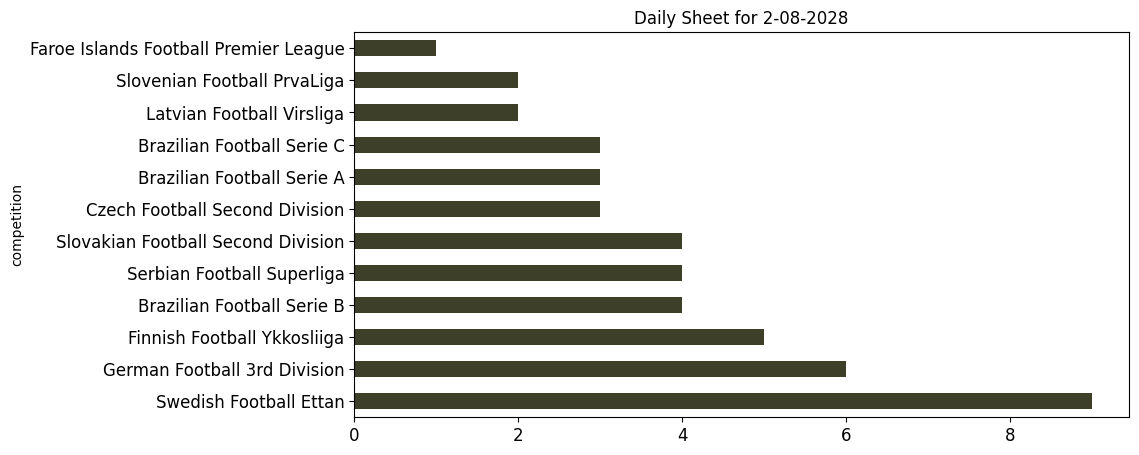

In [4]:
graphs(get_df(data),'competition')

Enter Chart Title Pie Chart showing Summary of Sports for 02-08-2028
Enter Chart Color #604652


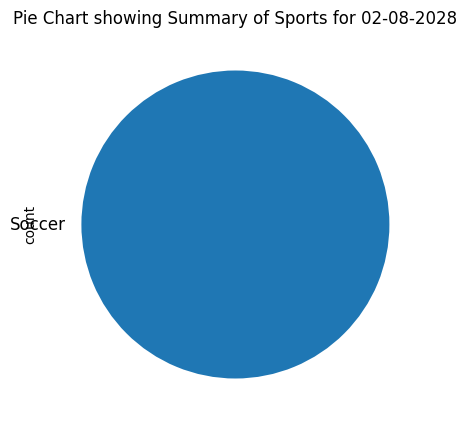

In [6]:
graphs(get_df(data),'sport', 'pie')

In [ ]:
df=pd.read_excel('/content/sample_df/Infront Bookings.xlsx',skiprows=1, sheet_name='July 25')
today=pd.to_datetime('today').strftime('%Y-%m-%d')
df.columns=df.columns.str.lower().str.strip()
df.columns
df.set_index('competition', inplace=True)
df = df[['date','start gmt', 'home', 'away','srt / rtmp url','igame channel','ingest method', 'sport']]
pd.to_datetime(df['date'])
df1= df[df['date']==today]
df1.sort_values(by=['start gmt'], inplace=True)
df1.index.value_counts().plot(kind='barh', color='red', figsize=(10,5), title='Today\'s Games', fontsize=12)